In [9]:
import numpy as np
from sklearn.metrics import classification_report
from sklearn.model_selection import ShuffleSplit, GridSearchCV
from sklearn.svm import SVC
import pickle

In [5]:
X_train = np.load('Data/X_train.npy')
y_train = np.load('Data/y_train.npy')
X_test = np.load('Data/X_test.npy')
y_test = np.load('Data/y_test.npy')

In [11]:
param_grid = [
    {
        'C': [0.1, 1, 10, 100, 1000],
        'kernel': ['linear']
    },
    {
        'C': [1, 10, 100, 1000],
        'gamma': [0.001, 0.0001],
        'kernel': ['rbf']
    },
]

cv = ShuffleSplit(n_splits=2, test_size=0.001, train_size=0.002, random_state=0)
clf = GridSearchCV(SVC(), param_grid, cv=cv, verbose=2, n_jobs=-1)
clf.fit(X_train, y_train)

Fitting 2 folds for each of 13 candidates, totalling 26 fits
[CV] END .................................C=1, kernel=linear; total time=   0.2s
[CV] END ..............................C=1000, kernel=linear; total time=   0.1s
[CV] END .....................C=10, gamma=0.0001, kernel=rbf; total time=   0.1s
[CV] END .................................C=1, kernel=linear; total time=   0.2s
[CV] END .......................C=1, gamma=0.001, kernel=rbf; total time=   0.1s
[CV] END .....................C=100, gamma=0.001, kernel=rbf; total time=   0.1s
[CV] END ...............................C=0.1, kernel=linear; total time=   0.2s
[CV] END .......................C=1, gamma=0.001, kernel=rbf; total time=   0.1s
[CV] END ....................C=100, gamma=0.0001, kernel=rbf; total time=   0.0s
[CV] END ...............................C=100, kernel=linear; total time=   0.2s
[CV] END ......................C=10, gamma=0.001, kernel=rbf; total time=   0.1s
[CV] END ....................C=1000, gamma=0.001

GridSearchCV(cv=ShuffleSplit(n_splits=2, random_state=0, test_size=0.001, train_size=0.002),
             estimator=SVC(), n_jobs=-1,
             param_grid=[{'C': [0.1, 1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}],
             verbose=2)

SVC(gamma='auto', kernel='linear')
              precision    recall  f1-score   support

          -2       0.32      0.74      0.45       473
          -1       0.59      0.56      0.57      2746
           0       0.78      0.57      0.66      4174
           1       0.37      0.76      0.50       522
           2       0.44      0.77      0.56       105

    accuracy                           0.59      8020
   macro avg       0.50      0.68      0.55      8020
weighted avg       0.66      0.59      0.61      8020

[[ 349   78   28   16    2]
 [ 416 1542  579  191   18]
 [ 301  965 2384  465   59]
 [   9   40   52  398   23]
 [   0    1   12   11   81]]


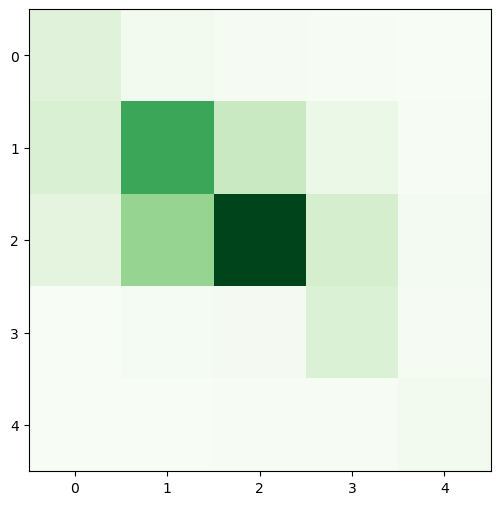

In [6]:
# importing the model
from sklearn import metrics

# parameter that determines the RBF core
# if ‘auto’, uses 1 / n_features.
gamma = 'auto'

# parameter that defines the transformation function
#kernel='rbf'
#kernel='linear'
# kernel='poly', degree=1

# determine the model of the classifier
model = SVC(kernel='linear', C=1.0, gamma='auto')
model.fit(X_train, y_train)
predicted = model.predict(X_test)
print(classification_report(y_test, predicted, zero_division=0))

In [10]:
with open("Trained_models/SVM.pkl", "wb") as f:
    pickle.dump(best_model, f)

In [7]:
# 45 57 66 50 56
# acc 59

SyntaxError: invalid syntax (871100427.py, line 1)